In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
credit_df = pd.read_csv( "German Credit Data.csv" )
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [4]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [5]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [8]:
encoded_credit_df = pd.get_dummies( credit_df[X_features], 
                                   drop_first = True )

In [9]:
Y = credit_df.status
X = encoded_credit_df

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, Y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion = 'gini', 
                                  max_depth = 3 )

In [11]:
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=3)

In [14]:
from sklearn import metrics

In [12]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual, 
                                    probs,
                                    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [15]:
tree_predict4 = clf_tree.predict( X_train )
metrics.roc_auc_score( y_train, tree_predict4 )

0.6067833442150089

In [16]:
tree_predict3 = clf_tree.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict3 ) 

0.5835743204164258

In [17]:
y_train_check2 = y_train.to_numpy()
Holder7 = pd.DataFrame()
Holder7['Actual'] = y_train_check2
Holder8 = pd.DataFrame(Holder7)
Holder7['Predicted'] = tree_predict4
print(Holder7)

     Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
695       1          0
696       0          0
697       0          0
698       1          0
699       0          0

[700 rows x 2 columns]


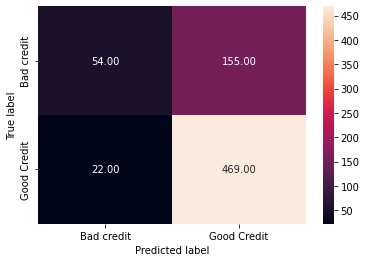

In [18]:
def draw_cm( actual, predicted ):
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted, labels = [1, 0])
    sn.heatmap(cm, annot=True, fmt='.2f',
              xticklabels = ["Bad credit", "Good Credit"],
              yticklabels = ["Bad credit", "Good Credit"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

draw_cm ( Holder7.Actual,
        Holder7.Predicted )

In [19]:
y_test_check2 = y_test.to_numpy()
Holder5 = pd.DataFrame()
Holder5['Actual'] = y_test_check2
Holder6 = pd.DataFrame(Holder5)
Holder5['Predicted'] = tree_predict3
print(Holder5)

     Actual  Predicted
0         1          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
295       0          0
296       1          0
297       0          0
298       0          1
299       1          0

[300 rows x 2 columns]


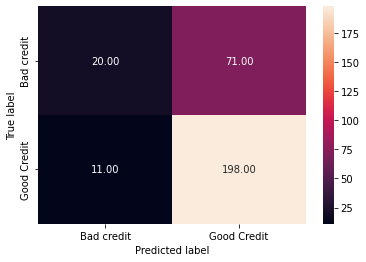

In [20]:
from sklearn import metrics
def draw_cm( actual, predicted ):
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted, labels = [1, 0])
    sn.heatmap(cm, annot=True, fmt='.2f',
              xticklabels = ["Bad credit", "Good Credit"],
              yticklabels = ["Bad credit", "Good Credit"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

draw_cm ( Holder5.Actual,
        Holder5.Predicted )

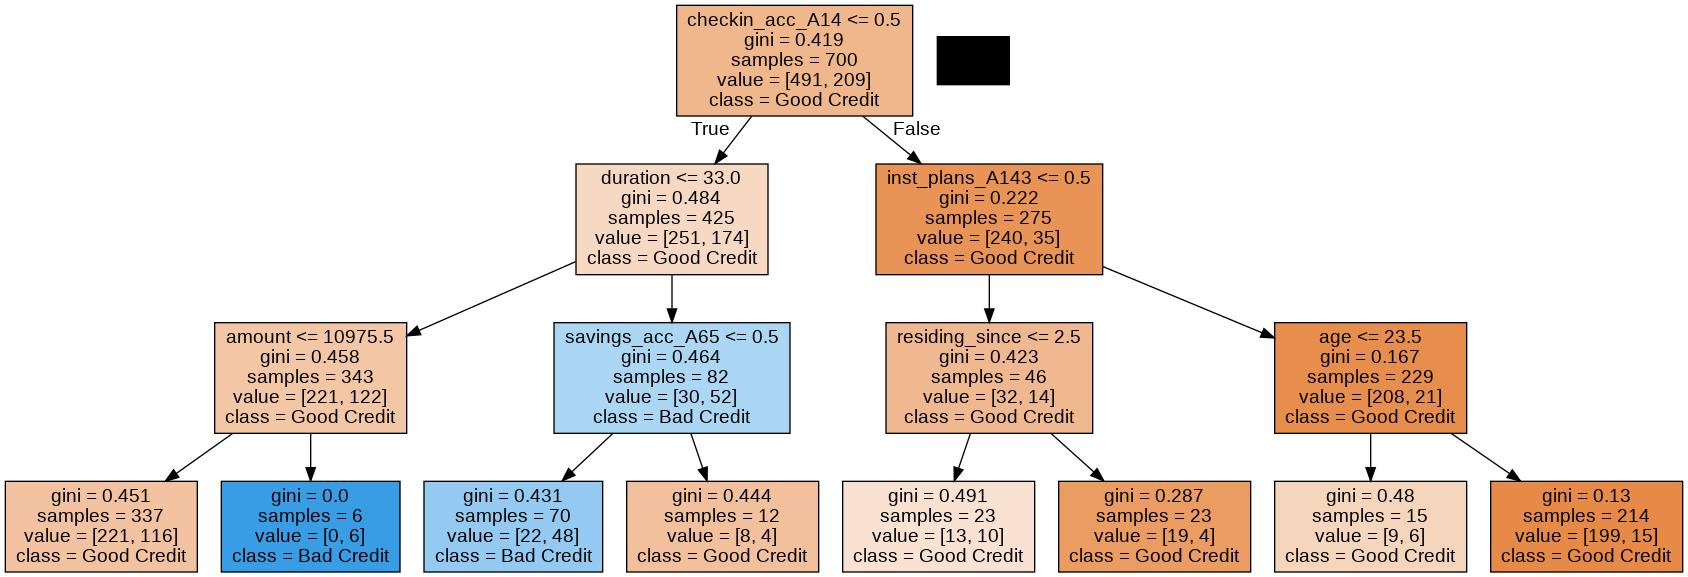

In [21]:
from sklearn.tree  import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export the tree into odt file
export_graphviz( clf_tree,
              out_file = "chd_tree.odt",
              feature_names = X_train.columns,
              class_names= ['Good Credit', 'Bad Credit'],  
              filled = True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.png' )
# Render the png file
Image(filename='chd_tree.png')

In [38]:
X_train.to_csv('credit_X.csv',index=True)

In [39]:
y_train.to_csv('credit_y.csv',index=True)

In [22]:
gini_node_1 = 1 - pow(491/700, 2) - pow (209/700, 2)
print( round( gini_node_1, 4) )

0.4189


In [23]:
X_test.shape

(300, 29)

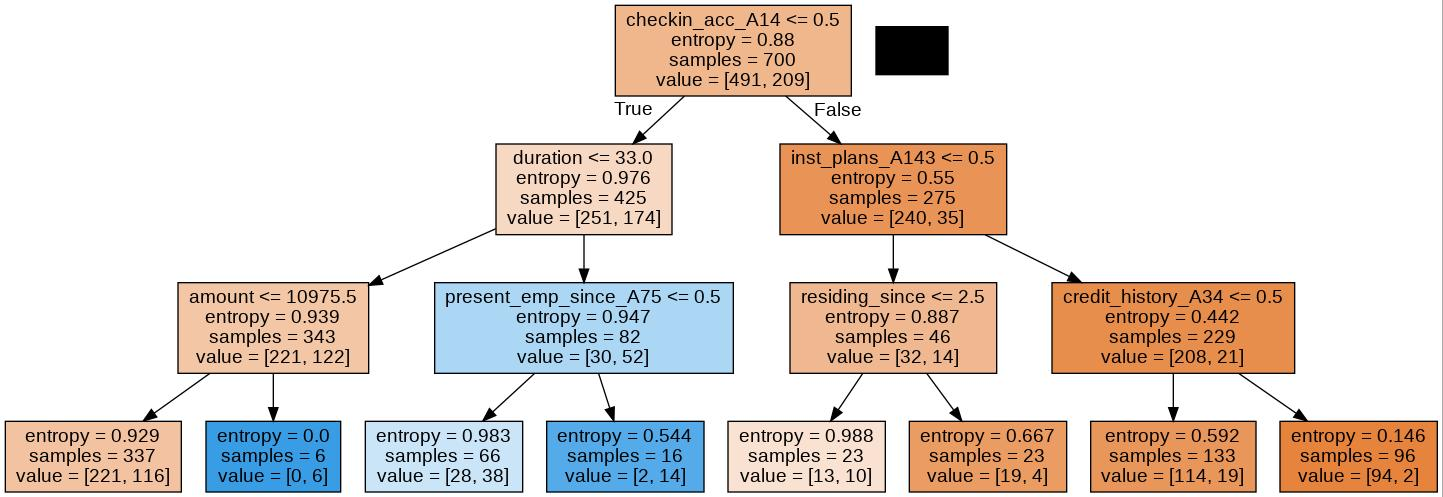

In [24]:
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy', 
                                          max_depth = 3 )
clf_tree_entropy.fit( X_train, y_train )

# Export the tree into odt file
export_graphviz( clf_tree_entropy,
              out_file = "chd_tree_entropy.odt",
              feature_names = X_train.columns,
              filled = True )

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree_entropy.odt' )
chd_tree_graph.write_jpg( 'chd_tree_entropy.png' )
# Render the png file
Image(filename='chd_tree_entropy.png')

In [25]:
import math

entropy_node_1 = - (491/700) * math.log2(491/700) - (209/700) * math.log2(209/700)
print( round( entropy_node_1, 2) )

0.88


In [26]:
tree_predict = clf_tree_entropy.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict ) 

0.5763972869236027

In [27]:
tree_predict2 = clf_tree_entropy.predict( X_train )
metrics.roc_auc_score( y_train, tree_predict2 )

0.6082060826942379

In [28]:
y_test_check = y_test.to_numpy()

In [29]:
print(type(y_test_check))
print(type(tree_predict))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [30]:
Holder1 = pd.DataFrame()
Holder1['Actual'] = y_test_check
Holder2 = pd.DataFrame(Holder1)
Holder1['Predicted'] = tree_predict
print(Holder1)

     Actual  Predicted
0         1          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
295       0          0
296       1          0
297       0          0
298       0          1
299       1          0

[300 rows x 2 columns]


In [31]:
y_train_check = y_train.to_numpy()
Holder3 = pd.DataFrame()
Holder3['Actual'] = y_train_check
Holder4 = pd.DataFrame(Holder3)
Holder3['Predicted'] = tree_predict2
print(Holder3)

     Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
695       1          0
696       0          0
697       0          0
698       1          0
699       0          0

[700 rows x 2 columns]


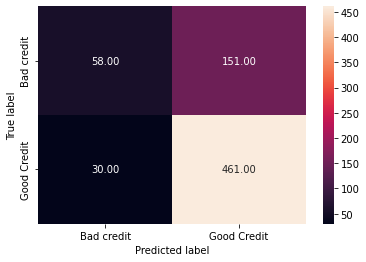

In [32]:
from sklearn import metrics
def draw_cm( actual, predicted ):
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted, labels = [1, 0])
    sn.heatmap(cm, annot=True, fmt='.2f',
              xticklabels = ["Bad credit", "Good Credit"],
              yticklabels = ["Bad credit", "Good Credit"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

draw_cm ( Holder3.Actual,
        Holder3.Predicted )   

In [33]:
from sklearn import metrics
def draw_cm( actual, predicted ):
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted, labels = [1, 0])
    sn.heatmap(cm, annot=True, fmt='.2f',
              xticklabels = ["Bad credit", "Good Credit"],
              yticklabels = ["Bad credit", "Good Credit"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

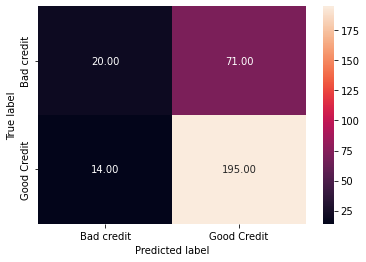

In [34]:
draw_cm ( Holder1.Actual,
        Holder1.Predicted ) 

In [35]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini','entropy'], 
                     'max_depth': range(2,10)}]


clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree,
                 tuned_parameters,
                 cv=10,
                 scoring='roc_auc')

clf.fit(X_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [36]:
clf.best_score_

0.6833090864917397

In [37]:
clf.best_params_
{'criterion': 'gini', 'max_depth': 4}

{'criterion': 'gini', 'max_depth': 4}

In [43]:
!jupyter nbconvert --to html German_Credit_Decision_Tree2111108.ipynb

[NbConvertApp] Converting notebook German_Credit_Decision_Tree2111108.ipynb to html
[NbConvertApp] Writing 677722 bytes to German_Credit_Decision_Tree2111108.html
